In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
expl = pd.read_csv('Variable_explanations.csv')

In [3]:
expl[expl['name'] == 'cons_nondurable']

,name,detail
11,cons_nondurable,Non-durable expenditure (USD)


In [6]:
def load_data(filepath):
    df = pd.read_csv(filepath, index_col='surveyid',
                    parse_dates=['survey_date'])
    
    target_columns = ['depressed']
    excluded_columns = ['survey_date']
    df_X = df.drop(columns=excluded_columns + target_columns)
    df_X = df_X.dropna(axis='columns')
    df_y = df[target_columns]
    return df_X, df_y.squeeze()

In [7]:
X, y = load_data('train.csv')

In [8]:
random_state = 176
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [9]:
X.shape, X_train.shape, X_test.shape

((1143, 49), (914, 49), (229, 49))

In [10]:
y.shape, y_train.shape, y_test.shape

((1143,), (914,), (229,))

In [11]:
classifier = RandomForestClassifier(n_estimators=100, max_features=1, random_state=random_state)

In [12]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=176, verbose=0, warm_start=False)

In [13]:
y_proba = classifier.predict_proba(X_test)

In [23]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
optimum = (tpr-fpr).argmax()

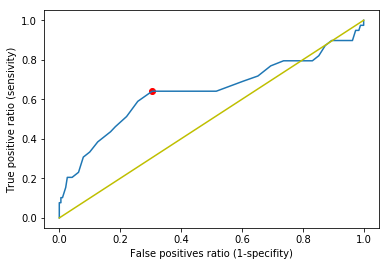

In [24]:
plt.plot(fpr, tpr)
plt.xlabel('False positives ratio (1-specifity)')
plt.ylabel('True positive ratio (sensivity)')
plt.plot([0, 1], [0, 1], c='y')
plt.scatter(fpr[optimum], tpr[optimum], c='r')
plt.show()

In [25]:
optimum

18

In [26]:
thresholds = thresholds[optimum]

In [27]:
y_pred = y_proba[:, 1] >= thresholds

In [28]:
y_true = y_test

In [31]:
confusion_matrix(y_true, y_pred)

array([[132,  58],
       [ 14,  25]])

In [33]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.79       190
           1       0.30      0.64      0.41        39

   micro avg       0.69      0.69      0.69       229
   macro avg       0.60      0.67      0.60       229
weighted avg       0.80      0.69      0.72       229



In [34]:
pd.crosstab(y_true, y_pred, margins=True)

col_0,False,True,All
depressed,,,
0,132,58,190
1,14,25,39
All,146,83,229


In [37]:
ct = pd.crosstab(y_true, y_pred, margins=True)
ct.index = ['irrelevant', 'relevant', 'all']
ct.columns = ['rejected', 'selected', 'all']
ct

,rejected,selected,all
irrelevant,132,58,190
relevant,14,25,39
all,146,83,229


In [39]:
true_positives = ct.loc['relevant', 'selected']
all_selected = ct.loc['all', 'selected']
positive_predictive_value = true_positives / all_selected
positive_predictive_value

0.30120481927710846